In [1]:
w=15
x=150

In [2]:
    from math import pi
    import numpy as np
    from numpy import array
    from scipy.interpolate import interp1d
    import sys

#  depth constraints for allowing rock parameterization
    z0=0
    zmax=30.0  # [km] (currently going way beyond our limits) the maximum depth generic rock descp = 8 km
    zmax=8.0   # [km] this is the max depth of the generic rock description 
    nsteps=500 # number of points to predefine parameters with. should be 100-500. Omega will be picked from
               # an iteration.
               

In [3]:
def genrockbeta(z):
    from numpy import array
    beta=np.zeros(z.size)
    Beta=np.array([
        [   0.,  .001,  .245,    0],
        [ .001,   .03, 2.206, .272],
        [ .030,  .190, 3.542, .407],
        [ .190, 4.000, 2.505, .199],
        [4.000, 8.000, 2.927, .086]])  #// Table 1 from Boore and Joyner 1997 (Generic Rock Shear velocity)
       # zmin, zmax, beta_0, ^exponent:   solution in km/s
    i=0
    for zi in np.nditer(z):
        if zi <= Beta[0,1]:
            beta[i]=Beta[0,2]*zi**Beta[0,3]
        elif zi <= Beta [1,1]:
            beta[i]=Beta[1,2]*zi**Beta[1,3]
        elif zi <= Beta [2,1]:
            beta[i]=Beta[2,2]*zi**Beta[2,3]
        elif zi <= Beta [3,1]:
            beta[i]=Beta[3,2]*zi**Beta[3,3]
        elif zi <= Beta [4,1]:
            beta[i]=Beta[4,2]*zi**Beta[4,3]
        else:
            beta[i]=Beta[4,2]*zi**Beta[4,3]  #extrapolate just don't use for very long periods
            #sys.exit("Frequency out of range.")
        i += 1  # pythons way
    return beta

def id_nearest(array,value):      # reports index nearest value from array
    idx = (np.abs(array - value)).argmin()
    return idx

# a number of numpy arrays to be populated with generic rock informaiton
z=np.linspace(z0,zmax,nsteps,endpoint=True)  # create a priori linear distribution.
beta=np.zeros(z.size)
tp=np.zeros(z.size)
omega=np.zeros(z.size)
f=np.zeros(z.size)
t_over4=np.zeros(z.size)
density=np.zeros(z.size)

beta=genrockbeta(z)  # call local program to calculate velocity profile for range of depths
tp=z/beta           # period for those ranges
t_over4=tp/4.       # quarter wavelength window. (quarter period in Boatwright/Boore lingo)
f=1./tp             # Frequency (have to put that factor of 4 back in..)
f[0]=1.e8           #  fix NaN
omega=2.*pi*f       # angular frequency
density=(2.5+(beta-0.3)*((2.8-2.5)/(3.5-0.3)))*1000. # ugly equation from Boore and Joyner
#print(z,beta,t_over4,tp,f,omega)  # (worth freq/z relationzhip)
idx=id_nearest(omega,w)
print(idx,z[idx],f[idx],omega[idx],t_over4[idx],density[idx])

dz=np.diff(z) # is constant (or better be)

imp = z[idx]*(np.sum(dz[:idx]/(density[:idx]*beta[:idx]))**-1) # //TODO right now z, dz in km (cancel out), density (kg/m3), beta in m/s


66 1.0581162324649298 2.3941783281586875 15.043066094254451 0.10441995780333947 2709.3736517912926


/Users/anewman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide


In [4]:
print(beta[idx],z[idx],density[idx],w,f[idx],imp)
z[idx]*(np.sum(dz[:idx]/(density[:idx]*beta[:idx]))**-1)

2.533318952440455 1.0581162324649298 2709.3736517912926 15 2.3941783281586875 4650.05412846233


4650.05412846233

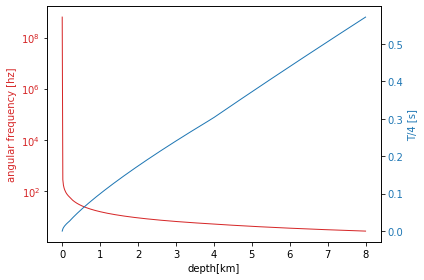

In [5]:
import matplotlib.pyplot as plt
fig,ax1=plt.subplots()
color='tab:red'
ax1.set_xlabel('depth[km]')
ax1.set_ylabel('angular frequency [hz]',color=color)
plt.yscale('log')
ax1.plot(z,omega, color=color, label='angular frequency [hz]', linewidth=1)
ax1.tick_params(axis='y', labelcolor=color)

ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('T/4 [s]',color=color)
ax2.plot(z,t_over4, color=color, label='T/4 [s]', linewidth=1)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.show()

In [6]:
w=np.logspace(-2,2,num=100)
#w=19

from math import pi
import numpy as np
from numpy import array
from scipy.interpolate import interp1d
import sys

#  depth constraints for allowing rock parameterization
z0=0
zmax=30.0  # [km] (currently going way beyond our limits) the maximum depth generic rock descp = 8 km
zmax=30.0   # [km] this is the max depth of the generic rock description
nsteps=2000 # number of points to predefine parameters with. should be 100-500. Omega will be picked from
           # an iteration.

def genrockbeta(z):
    from numpy import array
    beta=np.zeros(z.size)
    Beta=np.array([
        [   0.,  .001,  .245,    0],
        [ .001,   .03, 2.206, .272],
        [ .030,  .190, 3.542, .407],
        [ .190, 4.000, 2.505, .199],
        [4.000, 8.000, 2.927, .086]])  #// Table 1 from Boore and Joyner 1997 (Generic Rock Shear velocity)
       # zmin, zmax, beta_0, ^exponent:   solution in km/s
    i=0
    for zi in np.nditer(z):
        if zi <= Beta[0,1]:
            beta[i]=Beta[0,2]*zi**Beta[0,3]
        elif zi <= Beta [1,1]:
            beta[i]=Beta[1,2]*zi**Beta[1,3]
        elif zi <= Beta [2,1]:
            beta[i]=Beta[2,2]*zi**Beta[2,3]
        elif zi <= Beta [3,1]:
            beta[i]=Beta[3,2]*zi**Beta[3,3]
        elif zi <= Beta [4,1]:
            beta[i]=Beta[4,2]*zi**Beta[4,3]
        else:
            beta[i]=Beta[4,2]*zi**Beta[4,3]  #extrapolate just don't use for very long periods
            #sys.exit("Frequency out of range.")
        i += 1  # pythons way
    return beta

def id_nearest(array,value):      # reports index nearest value from array
    idx = (np.abs(array - value)).argmin()
    return idx

# a number of numpy arrays to be populated with generic rock informaiton
z=np.linspace(z0,zmax,nsteps,endpoint=True)  # create a priori linear distribution.
beta=np.zeros(z.size)
tp=np.zeros(z.size)
omega=np.zeros(z.size)
f=np.zeros(z.size)
t_over4=np.zeros(z.size)
density=np.zeros(z.size)

beta=genrockbeta(z)  # call local program to calculate velocity profile for range of depths
tp=z/beta           # period for those ranges
t_over4=tp/4.       # quarter wavelength window. (quarter period in Boatwright/Boore lingo)
f=1./tp             # Frequency (have to put that factor of 4 back in..)
f[0]=1.e8           #  fix NaN
omega=2.*pi*f       # angular frequency
density=(2.5+(beta-0.3)*((2.8-2.5)/(3.5-0.3)))*1000. # ugly equation from Boore and Joyner
dz=np.diff(z) # is constant (or better be)
#print(z,beta,t_over4,tp,f,omega)  # (worth freq/z relationzhip)

if isinstance(w, (int, float)):
    idx=id_nearest(omega,w*4)
    imp = z[idx]*(np.sum(dz[:idx]/(density[:idx]*beta[:idx]))**-1) # //TODO right now z, dz in km (cancel out), density (kg/m3), beta in m/s
    #print(idx,z[idx],f[idx],omega[idx],t_over4[idx],density[idx], imp)

elif len(w) > 1:
    imp=np.zeros(w.size)
    i=0
    for wi in np.nditer(w):
        idx=id_nearest(omega,wi*4)
        #print(idx)
        imp[i]=z[idx]*(np.sum(dz[:idx]/(density[:idx]*beta[:idx]))**-1) # //TODO right now z, dz in km (cancel out), density (kg/m3), beta in m/s
        i+=1

print(w,w/2/pi,imp,imp/620/2200)


[1.00000000e-02 1.09749877e-02 1.20450354e-02 1.32194115e-02
 1.45082878e-02 1.59228279e-02 1.74752840e-02 1.91791026e-02
 2.10490414e-02 2.31012970e-02 2.53536449e-02 2.78255940e-02
 3.05385551e-02 3.35160265e-02 3.67837977e-02 4.03701726e-02
 4.43062146e-02 4.86260158e-02 5.33669923e-02 5.85702082e-02
 6.42807312e-02 7.05480231e-02 7.74263683e-02 8.49753436e-02
 9.32603347e-02 1.02353102e-01 1.12332403e-01 1.23284674e-01
 1.35304777e-01 1.48496826e-01 1.62975083e-01 1.78864953e-01
 1.96304065e-01 2.15443469e-01 2.36448941e-01 2.59502421e-01
 2.84803587e-01 3.12571585e-01 3.43046929e-01 3.76493581e-01
 4.13201240e-01 4.53487851e-01 4.97702356e-01 5.46227722e-01
 5.99484250e-01 6.57933225e-01 7.22080902e-01 7.92482898e-01
 8.69749003e-01 9.54548457e-01 1.04761575e+00 1.14975700e+00
 1.26185688e+00 1.38488637e+00 1.51991108e+00 1.66810054e+00
 1.83073828e+00 2.00923300e+00 2.20513074e+00 2.42012826e+00
 2.65608778e+00 2.91505306e+00 3.19926714e+00 3.51119173e+00
 3.85352859e+00 4.229242

/Users/anewman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide


In [7]:
import numpy as np
from imp_bojoy import imp_bojoy
ws=np.logspace(-2,2,num=100)
w=10
imps=imp_bojoy(w)
print(w,imps)

10 2910.00783036729


/Users/anewman/Documents/Projects/NukeDetection/Impedance/imp_bojoy.py:108: RuntimeWarning: divide by zero encountered in true_divide
  f=1./tp             # Frequency (have to put that factor of 4 back in..)


In [105]:
f=2
print(1/(0.012*f**-.73),400*(f/1.5)**0.6)

138.21992430240695 475.36065545760084


In [1]:
print(f)

NameError: name 'f' is not defined